In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df.shape

(8555, 3)

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
from pandas.core.dtypes.common import is_numeric_dtype

for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    one = pd.get_dummies(df[col],drop_first=True)
    df.drop(df[[col]], axis=1, inplace=True)
    df=pd.concat([df,one], axis=1)
df.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [6]:
df.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


<AxesSubplot:xlabel='Male', ylabel='count'>

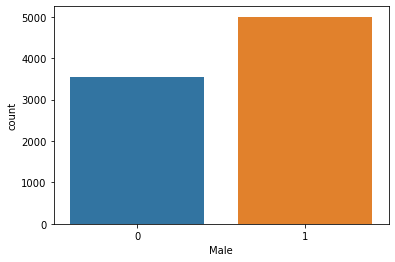

In [7]:
sns.countplot(df['Male'], data=df)

Text(0.5, 1.0, 'Height vs Gender')

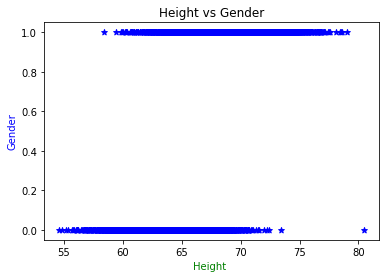

In [8]:
plt.scatter(df['Height'],df['Male'], color='blue', marker='*')
plt.xlabel('Height ', color='green')
plt.ylabel('Gender' , color='blue')
plt.title('Height vs Gender', color='black')

Text(0.5, 1.0, 'Weight vs Gender')

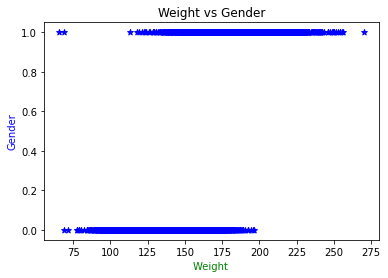

In [9]:
plt.scatter(df['Weight'],df['Male'], color='blue', marker='*')
plt.xlabel('Weight ', color='green')
plt.ylabel('Gender' , color='blue')
plt.title('Weight vs Gender', color='black')

In [10]:
x=df.drop(['Male'],axis=1)

In [11]:
y=df['Male']

In [12]:
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Male, dtype: uint8

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30, random_state=1)

In [16]:
xtrain.shape

(5988, 2)

In [17]:
xtest.shape

(2567, 2)

In [18]:
xtrain.head()

,Height,Weight
1277,72.385301,189.165592
5361,60.960147,124.876796
5728,69.119292,168.864403
4276,68.271050,172.941248
3112,64.991405,144.551044


In [19]:
xtest.head()

,Height,Weight
7154,65.068038,160.800726
3258,70.824643,184.516688
2188,68.663594,184.262796
5609,65.987610,166.844114
3186,70.901461,200.466282


# KNN Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knclf = KNeighborsClassifier(n_neighbors=93)
knclf.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=93)

In [21]:
KNCPred =  knclf.predict(xtest)
KNCPred

array([1, 1, 1, ..., 0, 1, 1], dtype=uint8)

In [22]:
np.array(ytest)

array([0, 1, 1, ..., 0, 1, 1], dtype=uint8)

In [23]:
from sklearn.metrics import   classification_report,accuracy_score,confusion_matrix, roc_curve, plot_roc_curve
print(classification_report(ytest, KNCPred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1055
           1       0.93      0.93      0.93      1512

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567



In [24]:
cm = confusion_matrix(ytest, KNCPred)
cm

array([[ 951,  104],
       [ 101, 1411]], dtype=int64)

In [25]:
knclf.score(xtest, ytest)

0.9201402415270744

In [26]:
from sklearn import metrics
metrics.accuracy_score(ytest, KNCPred) * 100

92.01402415270744

<AxesSubplot:>

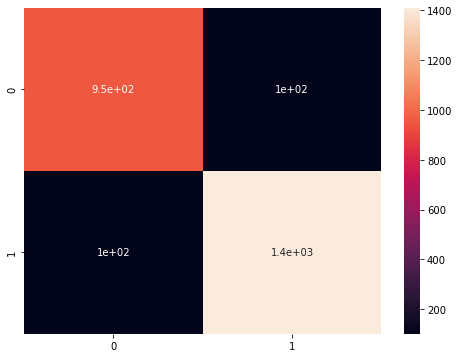

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(cm , annot = True)

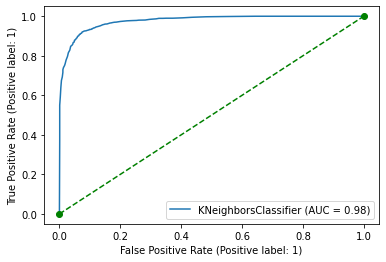

In [28]:
plot_roc_curve(knclf, xtest, ytest)
plt.plot([0,1],[0,1], 'go--')

# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
reg=LinearRegression()

In [31]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [32]:
ypred=reg.predict(xtest)
ypred

array([0.57393956, 0.73951033, 0.8207258 , ..., 0.34009443, 0.57491606,
       0.8940418 ])

In [33]:
np.array(ytest)

array([0, 1, 1, ..., 0, 1, 1], dtype=uint8)

In [34]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,ypred)
mse

0.08405293100951133

In [35]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest, ypred)
mae

0.23503850687795877

In [36]:
reg.score(xtrain, ytrain)

0.6334003740973202

In [37]:
reg.score(xtest,ytest)

0.6527835049117745

# KNN Regression

In [38]:
from sklearn.neighbors import KNeighborsRegressor

In [39]:
knreg= KNeighborsRegressor(n_neighbors=93)

In [40]:
knreg.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=93)

In [41]:
KNRPred=knreg.predict(xtest)
KNRPred

array([0.64516129, 0.96774194, 0.97849462, ..., 0.16129032, 0.79569892,
       0.97849462])

In [42]:
np.array(ytest)

array([0, 1, 1, ..., 0, 1, 1], dtype=uint8)

In [43]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,KNRPred)
mse

0.0587902440966647

In [44]:
from  sklearn.metrics import  mean_absolute_error
mae= mean_absolute_error(ytest,KNRPred)
mae


0.12056247408170703

In [45]:
knreg.score(xtrain,ytrain)

0.7347037402107259

In [46]:
knreg.score(xtest,ytest)

0.7571418122431061